In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_context("paper")
import matplotlib.ticker as ticker

from tqdm import tqdm # progress bars :)
tqdm.pandas()
from sklearn.metrics import r2_score
import scipy as sp

In [4]:
fm = pd.read_csv("gtdb-rs202.family.nucleotide-k21-scaled1000.prefetch.csv")
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,jaccard_ani_ci_low,jaccard_ani_ci_high,max_containment_ani,query_ani,query_ani_ci_low,query_ani_ci_high,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.846026,0.857953,0.853684,0.853684,0.847667,0.859713,0.850339,0.844338,0.856354,nucleotide-k21
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.844410,0.856542,0.852225,0.852225,0.846106,0.858357,0.848775,0.842673,0.854892,nucleotide-k21
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.977317,0.979006,0.978667,0.978667,0.977632,0.979665,0.977679,0.976628,0.978695,nucleotide-k21
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.848515,0.860284,0.854864,0.854864,0.848927,0.860810,0.853916,0.847984,0.859859,nucleotide-k21
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.846415,0.858488,0.852717,0.852717,0.846632,0.858814,0.852161,0.846079,0.858255,nucleotide-k21


In [5]:
fm.columns

Index(['intersect_bp', 'jaccard', 'max_containment', 'f_query_match',
       'f_match_query', 'match', 'match_filename', 'match_name', 'match_md5',
       'match_bp', 'query', 'query_filename', 'query_name', 'query_md5',
       'query_bp', 'ksize', 'moltype', 'num', 'scaled', 'query_nhashes',
       'query_abundance', 'jaccard_ani', 'jaccard_ani_ci_low',
       'jaccard_ani_ci_high', 'max_containment_ani', 'query_ani',
       'query_ani_ci_low', 'query_ani_ci_high', 'match_ani',
       'match_ani_ci_low', 'match_ani_ci_high', 'alpha-ksize'],
      dtype='object')

In [7]:
fm['avg_containment_ani'] = fm[["query_ani", "match_ani"]].mean(axis=1)
fm['avg_containment'] = fm[["f_query_match", "f_match_query"]].mean(axis=1)
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,max_containment_ani,query_ani,query_ani_ci_low,query_ani_ci_high,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.853684,0.853684,0.847667,0.859713,0.850339,0.844338,0.856354,nucleotide-k21,0.852012,0.034650
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.852225,0.852225,0.846106,0.858357,0.848775,0.842673,0.854892,nucleotide-k21,0.850500,0.033384
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.978667,0.978667,0.977632,0.979665,0.977679,0.976628,0.978695,nucleotide-k21,0.978173,0.629152
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.854864,0.854864,0.848927,0.860810,0.853916,0.847984,0.859859,nucleotide-k21,0.854390,0.036712
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.852717,0.852717,0.846632,0.858814,0.852161,0.846079,0.858255,nucleotide-k21,0.852439,0.034990


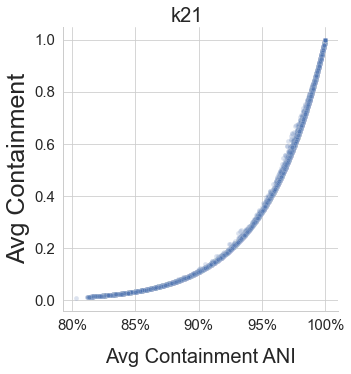

In [73]:
sns.set() # reset defaults
with sns.plotting_context("paper", font_scale=1.7,rc={"font.size":25,"axes.titlesize":20,"axes.labelsize":20}):
    sns.set_style("whitegrid")
    g=sns.relplot(data=fm, x="avg_containment_ani", y="avg_containment", alpha=0.2)
    
    #plt.gcf().set_size_inches(11, 7)
    #xlim=(0.3, 1)
    #ylim= (0.3, 1)
    for ax in g.fig.axes:
    #    ax.set(xlim=xlim, ylim=ylim)
    #    ax.plot(xlim, ylim, ls="--", c=".3")
    #    ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
    #     ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
    #    title = ax.get_title()
    #    if "jaccard" in title:
    #        new_title = "jaccard"
    #    elif "max" in title:
    #        new_title = "maxContain"
    #    elif "avg" in title:
    #        new_title = "avgContain"
    #    if "7" in title:
    #        new_title += "-k7"
    #    else:
    #        new_title += "-k10"
        #print(title, new_title)
    #    ax.set_title(new_title)
    #g.set_axis_labels("CompareM AAI", "K-mer AAI", size=20, labelpad=15)
    g.fig.suptitle('k21', size=20)
    #g.tight_layout()
    plt.xlabel("Avg Containment ANI", size=20, labelpad=15)
    plt.ylabel("Avg Containment", size=25)
    #lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    #fig = g.get_figure()

In [65]:
containment_bins = np.arange(0, 1.01, 0.01) #need to extend range to 1.01??
containment_bins05 = np.arange(0, 1.01, 0.05) 
containment_bins10 = np.arange(0, 1.01, 0.1) 
containment_bins20 = np.arange(0, 1.01, 0.2) 
containment_bins05

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [33]:
ani_bins = np.arange(0.8, 1.01, .01) #need to extend range to 1.01??
ani_bins

array([0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 ,
       0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  ])

In [21]:
fm['binned_avg_containment'] = pd.cut(x=fm['avg_containment'], 
                                      bins=containment_bins)

In [22]:
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,query_ani,query_ani_ci_low,query_ani_ci_high,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment,binned_avg_containment
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.853684,0.847667,0.859713,0.850339,0.844338,0.856354,nucleotide-k21,0.852012,0.034650,"(0.03, 0.04]"
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.852225,0.846106,0.858357,0.848775,0.842673,0.854892,nucleotide-k21,0.850500,0.033384,"(0.03, 0.04]"
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.978667,0.977632,0.979665,0.977679,0.976628,0.978695,nucleotide-k21,0.978173,0.629152,"(0.62, 0.63]"
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.854864,0.848927,0.860810,0.853916,0.847984,0.859859,nucleotide-k21,0.854390,0.036712,"(0.03, 0.04]"
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.852717,0.846632,0.858814,0.852161,0.846079,0.858255,nucleotide-k21,0.852439,0.034990,"(0.03, 0.04]"


In [37]:
fm.groupby(['binned_avg_containment'])['avg_containment_ani'].mean().reset_index()

,binned_avg_containment,avg_containment_ani
0,"(0.0, 0.01]",0.802945
1,"(0.01, 0.02]",0.825731
2,"(0.02, 0.03]",0.836757
3,"(0.03, 0.04]",0.850914
4,"(0.04, 0.05]",0.862227
...,...,...
95,"(0.95, 0.96]",0.997735
96,"(0.96, 0.97]",0.998315
97,"(0.97, 0.98]",0.998826
98,"(0.98, 0.99]",0.999359


In [34]:
fm['binned_ac_ANI'] = pd.cut(x=fm['avg_containment_ani'], 
                                      bins=ani_bins)
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,query_ani_ci_low,query_ani_ci_high,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment,binned_avg_containment,binned_ac_ANI
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.847667,0.859713,0.850339,0.844338,0.856354,nucleotide-k21,0.852012,0.034650,"(0.03, 0.04]","(0.85, 0.86]"
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.846106,0.858357,0.848775,0.842673,0.854892,nucleotide-k21,0.850500,0.033384,"(0.03, 0.04]","(0.85, 0.86]"
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.977632,0.979665,0.977679,0.976628,0.978695,nucleotide-k21,0.978173,0.629152,"(0.62, 0.63]","(0.97, 0.98]"
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.848927,0.860810,0.853916,0.847984,0.859859,nucleotide-k21,0.854390,0.036712,"(0.03, 0.04]","(0.85, 0.86]"
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.846632,0.858814,0.852161,0.846079,0.858255,nucleotide-k21,0.852439,0.034990,"(0.03, 0.04]","(0.85, 0.86]"


In [38]:
fm.groupby(['binned_ac_ANI'])['avg_containment'].describe().reset_index()

,binned_ac_ANI,count,mean,std,min,25%,50%,75%,max
0,"(0.8, 0.81]",1.0,0.009969,NaN,0.009969,0.009969,0.009969,0.009969,0.009969
1,"(0.81, 0.82]",128.0,0.014570,0.000864,0.012789,0.013877,0.014845,0.015239,0.016007
2,"(0.82, 0.83]",1160.0,0.018685,0.001187,0.015520,0.017999,0.019066,0.019569,0.020588
3,"(0.83, 0.84]",3928.0,0.022586,0.001399,0.019994,0.021586,0.022381,0.023433,0.026341
4,"(0.84, 0.85]",4258.0,0.030688,0.002287,0.025701,0.028843,0.031731,0.032646,0.033410
5,"(0.85, 0.86]",10373.0,0.034308,0.001356,0.032947,0.033507,0.033993,0.034632,0.043536
6,"(0.86, 0.87]",988.0,0.049484,0.003460,0.042178,0.046620,0.050541,0.052408,0.054585
7,"(0.87, 0.88]",2044.0,0.061023,0.004355,0.053721,0.057198,0.060533,0.065095,0.068967
8,"(0.88, 0.89]",1562.0,0.074583,0.005581,0.068274,0.069513,0.072526,0.079466,0.087490
9,"(0.89, 0.9]",1417.0,0.099599,0.005855,0.086618,0.095688,0.100682,0.104157,0.120482


In [53]:
ani_infok21 = fm.groupby('binned_ac_ANI').agg({'avg_containment': ['count','min', 'max', 'mean']}).round(3)
ani_infok21

avg_containment                     
                        count    min    max   mean
binned_ac_ANI                                     
(0.8, 0.81]                 1  0.010  0.010  0.010
(0.81, 0.82]              128  0.013  0.016  0.015
(0.82, 0.83]             1160  0.016  0.021  0.019
(0.83, 0.84]             3928  0.020  0.026  0.023
(0.84, 0.85]             4258  0.026  0.033  0.031
(0.85, 0.86]            10373  0.033  0.044  0.034
(0.86, 0.87]              988  0.042  0.055  0.049
(0.87, 0.88]             2044  0.054  0.069  0.061
(0.88, 0.89]             1562  0.068  0.087  0.075
(0.89, 0.9]              1417  0.087  0.120  0.100
(0.9, 0.91]               941  0.109  0.142  0.126
(0.91, 0.92]             1625  0.138  0.186  0.152
(0.92, 0.93]             2123  0.174  0.227  0.199
(0.93, 0.94]             1024  0.218  0.281  0.242
(0.94, 0.95]              883  0.273  0.345  0.307
(0.95, 0.96]             4226  0.341  0.445  0.400
(0.96, 0.97]             8884  0.424  0.593  0.481
(0.97, 0.98]            23835  0.528  0.702  0.619
(0.98, 0.99]            27101  0.654  0.825  0.735
(0.99, 1.0]             36679  0.810  1.000  0.914

In [59]:
ani_infok21 = fm.groupby('binned_ac_ANI').agg({'avg_containment': ['count','min', 'max', 'mean']}).round(2)
ani_infok21

avg_containment                  
                        count   min   max  mean
binned_ac_ANI                                  
(0.8, 0.81]                 1  0.01  0.01  0.01
(0.81, 0.82]              128  0.01  0.02  0.01
(0.82, 0.83]             1160  0.02  0.02  0.02
(0.83, 0.84]             3928  0.02  0.03  0.02
(0.84, 0.85]             4258  0.03  0.03  0.03
(0.85, 0.86]            10373  0.03  0.04  0.03
(0.86, 0.87]              988  0.04  0.05  0.05
(0.87, 0.88]             2044  0.05  0.07  0.06
(0.88, 0.89]             1562  0.07  0.09  0.07
(0.89, 0.9]              1417  0.09  0.12  0.10
(0.9, 0.91]               941  0.11  0.14  0.13
(0.91, 0.92]             1625  0.14  0.19  0.15
(0.92, 0.93]             2123  0.17  0.23  0.20
(0.93, 0.94]             1024  0.22  0.28  0.24
(0.94, 0.95]              883  0.27  0.35  0.31
(0.95, 0.96]             4226  0.34  0.45  0.40
(0.96, 0.97]             8884  0.42  0.59  0.48
(0.97, 0.98]            23835  0.53  0.70  0.62
(0.98, 0.99]            27101  0.65  0.83  0.73
(0.99, 1.0]             36679  0.81  1.00  0.91

In [54]:
contain_infok21 = fm.groupby('binned_avg_containment').agg({'avg_containment_ani': ['count','min', 'max']}).round(2)
contain_infok21


avg_containment_ani            
                                     count   min   max
binned_avg_containment                                
(0.0, 0.01]                              1  0.80  0.80
(0.01, 0.02]                          1223  0.81  0.83
(0.02, 0.03]                          5409  0.83  0.85
(0.03, 0.04]                         13039  0.85  0.86
(0.04, 0.05]                           610  0.86  0.87
...                                    ...   ...   ...
(0.95, 0.96]                          2069  1.00  1.00
(0.96, 0.97]                           804  1.00  1.00
(0.97, 0.98]                          1110  1.00  1.00
(0.98, 0.99]                          3789  1.00  1.00
(0.99, 1.0]                           7918  1.00  1.00

[100 rows x 3 columns]

In [57]:
fm['binned_avg_containment05'] = pd.cut(x=fm['avg_containment'], 
                                      bins=containment_bins05)
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,query_ani_ci_high,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment,binned_avg_containment,binned_ac_ANI,binned_avg_containment05
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.859713,0.850339,0.844338,0.856354,nucleotide-k21,0.852012,0.034650,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]"
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.858357,0.848775,0.842673,0.854892,nucleotide-k21,0.850500,0.033384,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]"
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.979665,0.977679,0.976628,0.978695,nucleotide-k21,0.978173,0.629152,"(0.62, 0.63]","(0.97, 0.98]","(0.6, 0.65]"
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.860810,0.853916,0.847984,0.859859,nucleotide-k21,0.854390,0.036712,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]"
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.858814,0.852161,0.846079,0.858255,nucleotide-k21,0.852439,0.034990,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]"


In [70]:
contain05_infok21 = fm.groupby('binned_avg_containment05').agg({'avg_containment_ani': ['count','min', 'max', 'mean']}).round(2)
contain05_infok21

avg_containment_ani                  
                                       count   min   max  mean
binned_avg_containment05                                      
(0.0, 0.05]                            20282  0.80  0.87  0.85
(0.05, 0.1]                             4832  0.87  0.90  0.88
(0.1, 0.15]                             2544  0.90  0.91  0.91
(0.15, 0.2]                             1845  0.91  0.93  0.92
(0.2, 0.25]                             1700  0.92  0.94  0.93
(0.25, 0.3]                              701  0.93  0.94  0.94
(0.3, 0.35]                              717  0.94  0.95  0.95
(0.35, 0.4]                             1378  0.95  0.96  0.95
(0.4, 0.45]                             3820  0.95  0.96  0.96
(0.45, 0.5]                             5588  0.96  0.97  0.97
(0.5, 0.55]                             3218  0.96  0.97  0.97
(0.55, 0.6]                             4155  0.97  0.98  0.97
(0.6, 0.65]                            16683  0.97  0.98  0.98
(0.65, 0.7]                            10323  0.98  0.98  0.98
(0.7, 0.75]                             5569  0.98  0.99  0.98
(0.75, 0.8]                            11017  0.98  0.99  0.99
(0.8, 0.85]                            12886  0.99  0.99  0.99
(0.85, 0.9]                             6538  0.99  0.99  0.99
(0.9, 0.95]                             3694  0.99  1.00  1.00
(0.95, 1.0]                            15690  1.00  1.00  1.00

In [61]:
fm['binned_avg_containment10'] = pd.cut(x=fm['avg_containment'], 
                                      bins=containment_bins10)
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,match_ani,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment,binned_avg_containment,binned_ac_ANI,binned_avg_containment05,binned_avg_containment10
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.850339,0.844338,0.856354,nucleotide-k21,0.852012,0.034650,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]"
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.848775,0.842673,0.854892,nucleotide-k21,0.850500,0.033384,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]"
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.977679,0.976628,0.978695,nucleotide-k21,0.978173,0.629152,"(0.62, 0.63]","(0.97, 0.98]","(0.6, 0.65]","(0.6, 0.7]"
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.853916,0.847984,0.859859,nucleotide-k21,0.854390,0.036712,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]"
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.852161,0.846079,0.858255,nucleotide-k21,0.852439,0.034990,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]"


In [62]:
contain10_infok21 = fm.groupby('binned_avg_containment10').agg({'avg_containment_ani': ['count','min', 'max']}).round(2)
contain10_infok21

avg_containment_ani            
                                       count   min   max
binned_avg_containment10                                
(0.0, 0.1]                             25114  0.80  0.90
(0.1, 0.2]                              4389  0.90  0.93
(0.2, 0.3]                              2401  0.92  0.94
(0.3, 0.4]                              2095  0.94  0.96
(0.4, 0.5]                              9408  0.95  0.97
(0.5, 0.6]                              7373  0.96  0.98
(0.6, 0.7]                             27006  0.97  0.98
(0.7, 0.8]                             16586  0.98  0.99
(0.8, 0.9]                             19424  0.99  0.99
(0.9, 1.0]                             19384  0.99  1.00

In [68]:
fm['binned_avg_containment20'] = pd.cut(x=fm['avg_containment'], 
                                      bins=containment_bins20)
fm.head()

,intersect_bp,jaccard,max_containment,f_query_match,f_match_query,match,match_filename,match_name,match_md5,match_bp,...,match_ani_ci_low,match_ani_ci_high,alpha-ksize,avg_containment_ani,avg_containment,binned_avg_containment,binned_ac_ANI,binned_avg_containment05,binned_avg_containment10,binned_avg_containment20
0,170000,0.017600,0.036078,0.033223,0.036078,NaN,/dev/fd/63,GCF_006461405.1 Salmonella enterica strain=GSJ...,2b1a9eae,5117000,...,0.844338,0.856354,nucleotide-k21,0.852012,0.034650,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]","(0.0, 0.2]"
1,164000,0.016944,0.034805,0.031963,0.034805,NaN,/dev/fd/63,GCF_003064405.1 Salmonella enterica subsp. ent...,950d882a,5131000,...,0.842673,0.854892,nucleotide-k21,0.850500,0.033384,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]","(0.0, 0.2]"
2,2996000,0.458876,0.635823,0.622481,0.635823,NaN,/dev/fd/63,GCF_013372345.1 Escherichia coli strain=EcPF16...,dcfd3a9a,4813000,...,0.976628,0.978695,nucleotide-k21,0.978173,0.629152,"(0.62, 0.63]","(0.97, 0.98]","(0.6, 0.65]","(0.6, 0.7]","(0.6, 0.8]"
3,175000,0.018697,0.037139,0.036284,0.037139,NaN,/dev/fd/63,GCF_012052805.1 Salmonella enterica subsp. ent...,692f2c62,4823000,...,0.847984,0.859859,nucleotide-k21,0.854390,0.036712,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]","(0.0, 0.2]"
4,166000,0.017805,0.035229,0.034750,0.035229,NaN,/dev/fd/63,GCF_001246885.1 Salmonella enterica subsp. ent...,6b043590,4777000,...,0.846079,0.858255,nucleotide-k21,0.852439,0.034990,"(0.03, 0.04]","(0.85, 0.86]","(0.0, 0.05]","(0.0, 0.1]","(0.0, 0.2]"


In [69]:
contain20_infok21 = fm.groupby('binned_avg_containment20').agg({'avg_containment_ani': ['count','min', 'max']}).round(2)
contain20_infok21

avg_containment_ani            
                                       count   min   max
binned_avg_containment20                                
(0.0, 0.2]                             29503  0.80  0.93
(0.2, 0.4]                              4496  0.92  0.96
(0.4, 0.6]                             16781  0.95  0.98
(0.6, 0.8]                             43592  0.97  0.99
(0.8, 1.0]                             38808  0.99  1.00

In [152]:
contain05_infok21 = fm.groupby('binned_avg_containment05').agg({'avg_containment_ani': ['count','min', 'max', 'mean']}).round(2)
#contain05_infok21.droplevel(level=1, axis=1)
contain05_infok21.columns = contain05_infok21.columns.droplevel()
contain05_infok21.reset_index(inplace=True)#.rename(columns={'index': 'binned_avg_containment05'})
rename_cols = {"min": "minANI", "max": "maxANI", "mean": "meanANI"}
contain05_infok21.rename(columns = rename_cols, inplace=True)
contain05_infok21

,binned_avg_containment05,count,minANI,maxANI,meanANI
0,"(0.0, 0.05]",20282,0.80,0.87,0.85
1,"(0.05, 0.1]",4832,0.87,0.90,0.88
2,"(0.1, 0.15]",2544,0.90,0.91,0.91
3,"(0.15, 0.2]",1845,0.91,0.93,0.92
4,"(0.2, 0.25]",1700,0.92,0.94,0.93
5,"(0.25, 0.3]",701,0.93,0.94,0.94
6,"(0.3, 0.35]",717,0.94,0.95,0.95
7,"(0.35, 0.4]",1378,0.95,0.96,0.95
8,"(0.4, 0.45]",3820,0.95,0.96,0.96
9,"(0.45, 0.5]",5588,0.96,0.97,0.97


In [160]:
# make separate col with str so we can modify it. keep categorical col for plotting.
contain05_infok21['crange'] = contain05_infok21['binned_avg_containment05'].astype("str")
contain05_infok21['high_containment'] = contain05_infok21['crange'].str.split(',', expand=True)[1].str.rstrip(']')
#contain05_infok21.set_index('high_containment', inplace=True)
#contain05_infok21 = contain05_infok21.set_index('high_containment').rename_axis(None, axis=0)
contain05_infok21.drop(columns=["crange"], inplace=True) # no need for this dup col. keep categorical col for plotting.
contain05_infok21
contain05_infok21.to_csv("mean-containment-k21-to-ANI.csv", index=False)

avg_containment_ani                    \
                                       count   min   max  mean   
binned_avg_containment05                                         
(0.0, 0.05]                            20282  0.80  0.87  0.85   
(0.05, 0.1]                             4832  0.87  0.90  0.88   
(0.1, 0.15]                             2544  0.90  0.91  0.91   
(0.15, 0.2]                             1845  0.91  0.93  0.92   
(0.2, 0.25]                             1700  0.92  0.94  0.93   
(0.25, 0.3]                              701  0.93  0.94  0.94   
(0.3, 0.35]                              717  0.94  0.95  0.95   
(0.35, 0.4]                             1378  0.95  0.96  0.95   
(0.4, 0.45]                             3820  0.95  0.96  0.96   
(0.45, 0.5]                             5588  0.96  0.97  0.97   
(0.5, 0.55]                             3218  0.96  0.97  0.97   
(0.55, 0.6]                             4155  0.97  0.98  0.97   
(0.6, 0.65]                            16683  0.97  0.98  0.98   
(0.65, 0.7]                            10323  0.98  0.98  0.98   
(0.7, 0.75]                             5569  0.98  0.99  0.98   
(0.75, 0.8]                            11017  0.98  0.99  0.99   
(0.8, 0.85]                            12886  0.99  0.99  0.99   
(0.85, 0.9]                             6538  0.99  0.99  0.99   
(0.9, 0.95]                             3694  0.99  1.00  1.00   
(0.95, 1.0]                            15690  1.00  1.00  1.00   

                         high_containment  
                                           
binned_avg_containment05                   
(0.0, 0.05]                   (0.0, 0.05]  
(0.05, 0.1]                   (0.05, 0.1]  
(0.1, 0.15]                   (0.1, 0.15]  
(0.15, 0.2]                   (0.15, 0.2]  
(0.2, 0.25]                   (0.2, 0.25]  
(0.25, 0.3]                   (0.25, 0.3]  
(0.3, 0.35]                   (0.3, 0.35]  
(0.35, 0.4]                   (0.35, 0.4]  
(0.4, 0.45]                   (0.4, 0.45]  
(0.45, 0.5]                   (0.45, 0.5]  
(0.5, 0.55]                   (0.5, 0.55]  
(0.55, 0.6]                   (0.55, 0.6]  
(0.6, 0.65]                   (0.6, 0.65]  
(0.65, 0.7]                   (0.65, 0.7]  
(0.7, 0.75]                   (0.7, 0.75]  
(0.75, 0.8]                   (0.75, 0.8]  
(0.8, 0.85]                   (0.8, 0.85]  
(0.85, 0.9]                   (0.85, 0.9]  
(0.9, 0.95]                   (0.9, 0.95]  
(0.95, 1.0]                   (0.95, 1.0]